In [45]:
import os
import numpy as np
import pandas as pd
from torch import load, device
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import ttest_rel
import sys
sys.path.append('/home/maelle/GitHub_repositories/cNeuromod_encoding_2020')  
import models

In [2]:
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06']
basepath = '/home/maelle/Results/best_models'
mist_roi_labels = '/home/maelle/DataBase/fMRI_parcellations/MIST_parcellation/Parcel_Information/MIST_ROI.csv'

label_pd = pd.read_csv(mist_roi_labels, sep=';')
r_heschls_df = label_pd.loc[label_pd['name'] == "right_HESCHLS GYRUS"]
l_heschls_df = label_pd.loc[label_pd['name'] == "left_HESCHLS GYRUS"]
print(label_pd['name'])


0                     right_SUPERIOR_PARIETAL_LOBULE
1                      left_SUPERIOR_PARIETAL_LOBULE
2                              right_CAUDATE_ventral
3                               left_CAUDATE_ventral
4                             left_CEREBELLUM_VERMIS
                           ...                      
205          right_SUPERIOR_TEMPORAL_GYRUS_posterior
206             left_VENTROLATERAL_PREFRONTAL_CORTEX
207                right_CEREBELLUM_CRUSII_posterior
208     left_PRE_SUPPLEMENTARY_MOTOR_CORTEX_anterior
209    right_PRE_SUPPLEMENTARY_MOTOR_CORTEX_anterior
Name: name, Length: 210, dtype: object


### figure sur r2 runs statistiques 

In [3]:
runs_path = '/home/maelle/Results/best_models/predict_S4_runs'
columns_label = label_pd['name']
df = pd.DataFrame()
for model in os.listdir(runs_path):
    if not '_f_conv' in model and not 'Voxels' in model:
        sub = model[:6]
        sub_path = os.path.join(runs_path, model)
        sub_array = np.load(sub_path)
        print(sub, sub_array.shape)
        sub_df = pd.DataFrame(sub_array).rename(label_pd['name'], axis='columns')
        sub_df_melt = sub_df.melt(var_name='label', value_name='r2', ignore_index=False).reset_index()
        sub_df_melt.rename({'index' : 'run'}, axis='columns', inplace=True)
        sub_list = [sub]*sub_df_melt.shape[0]
        sub_df_melt['subject'] = sub_list
        df = pd.concat([df, sub_df_melt], axis=0, join='outer')
print(sub_df_melt.shape, df.shape)

sub-02 (47, 210)
sub-04 (47, 210)
sub-01 (47, 210)
sub-06 (47, 210)
sub-05 (44, 210)
sub-03 (47, 210)
(9870, 4) (58590, 4)


sub-01
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_SUPERIOR_TEMPORAL_GYRUS_middle in sub-01
Ttest_relResult(statistic=2.4046031227913254, pvalue=0.0202726083380506)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_SUPERIOR_TEMPORAL_GYRUS_posterior in sub-01
Ttest_relResult(statistic=8.640249389677374, pvalue=3.427753269610673e-11)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_MIDDLE_TEMPORAL_GYRUS_posterior in sub-01
Ttest_relResult(statistic=5.906981389353767, pvalue=3.99123367843347e-07)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and right_SUPERIOR_TEMPORAL_GYRUS_posterior in sub-01
Ttest_relResult(statistic=8.038948102775535, pvalue=2.5913964071989327e-10)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and right_VENTRAL_VISUAL_NETWORK_lateral in sub-01
Ttest_relResult(statistic=7.785692031690235, pvalue=6.132168836522321e-10)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_POST

paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_SUPERIOR_TEMPORAL_GYRUS_middle in sub-06
Ttest_relResult(statistic=5.2978916790388215, pvalue=3.2144536318840757e-06)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_SUPERIOR_TEMPORAL_GYRUS_posterior in sub-06
Ttest_relResult(statistic=7.930346479228686, pvalue=3.7469737630665735e-10)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and right_SUPERIOR_TEMPORAL_GYRUS_posterior in sub-06
Ttest_relResult(statistic=13.339074989135758, pvalue=2.0259517994275384e-17)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_MIDDLE_TEMPORAL_GYRUS_posterior in sub-06
Ttest_relResult(statistic=11.451663280385851, pvalue=4.597114359423093e-15)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and left_LATERAL_VISUAL_NETWORK_dorsoposterior in sub-06
Ttest_relResult(statistic=11.661132844365252, pvalue=2.461720340476203e-15)
paired ttest between right_SUPERIOR_TEMPORAL_GYRUS_middle and r

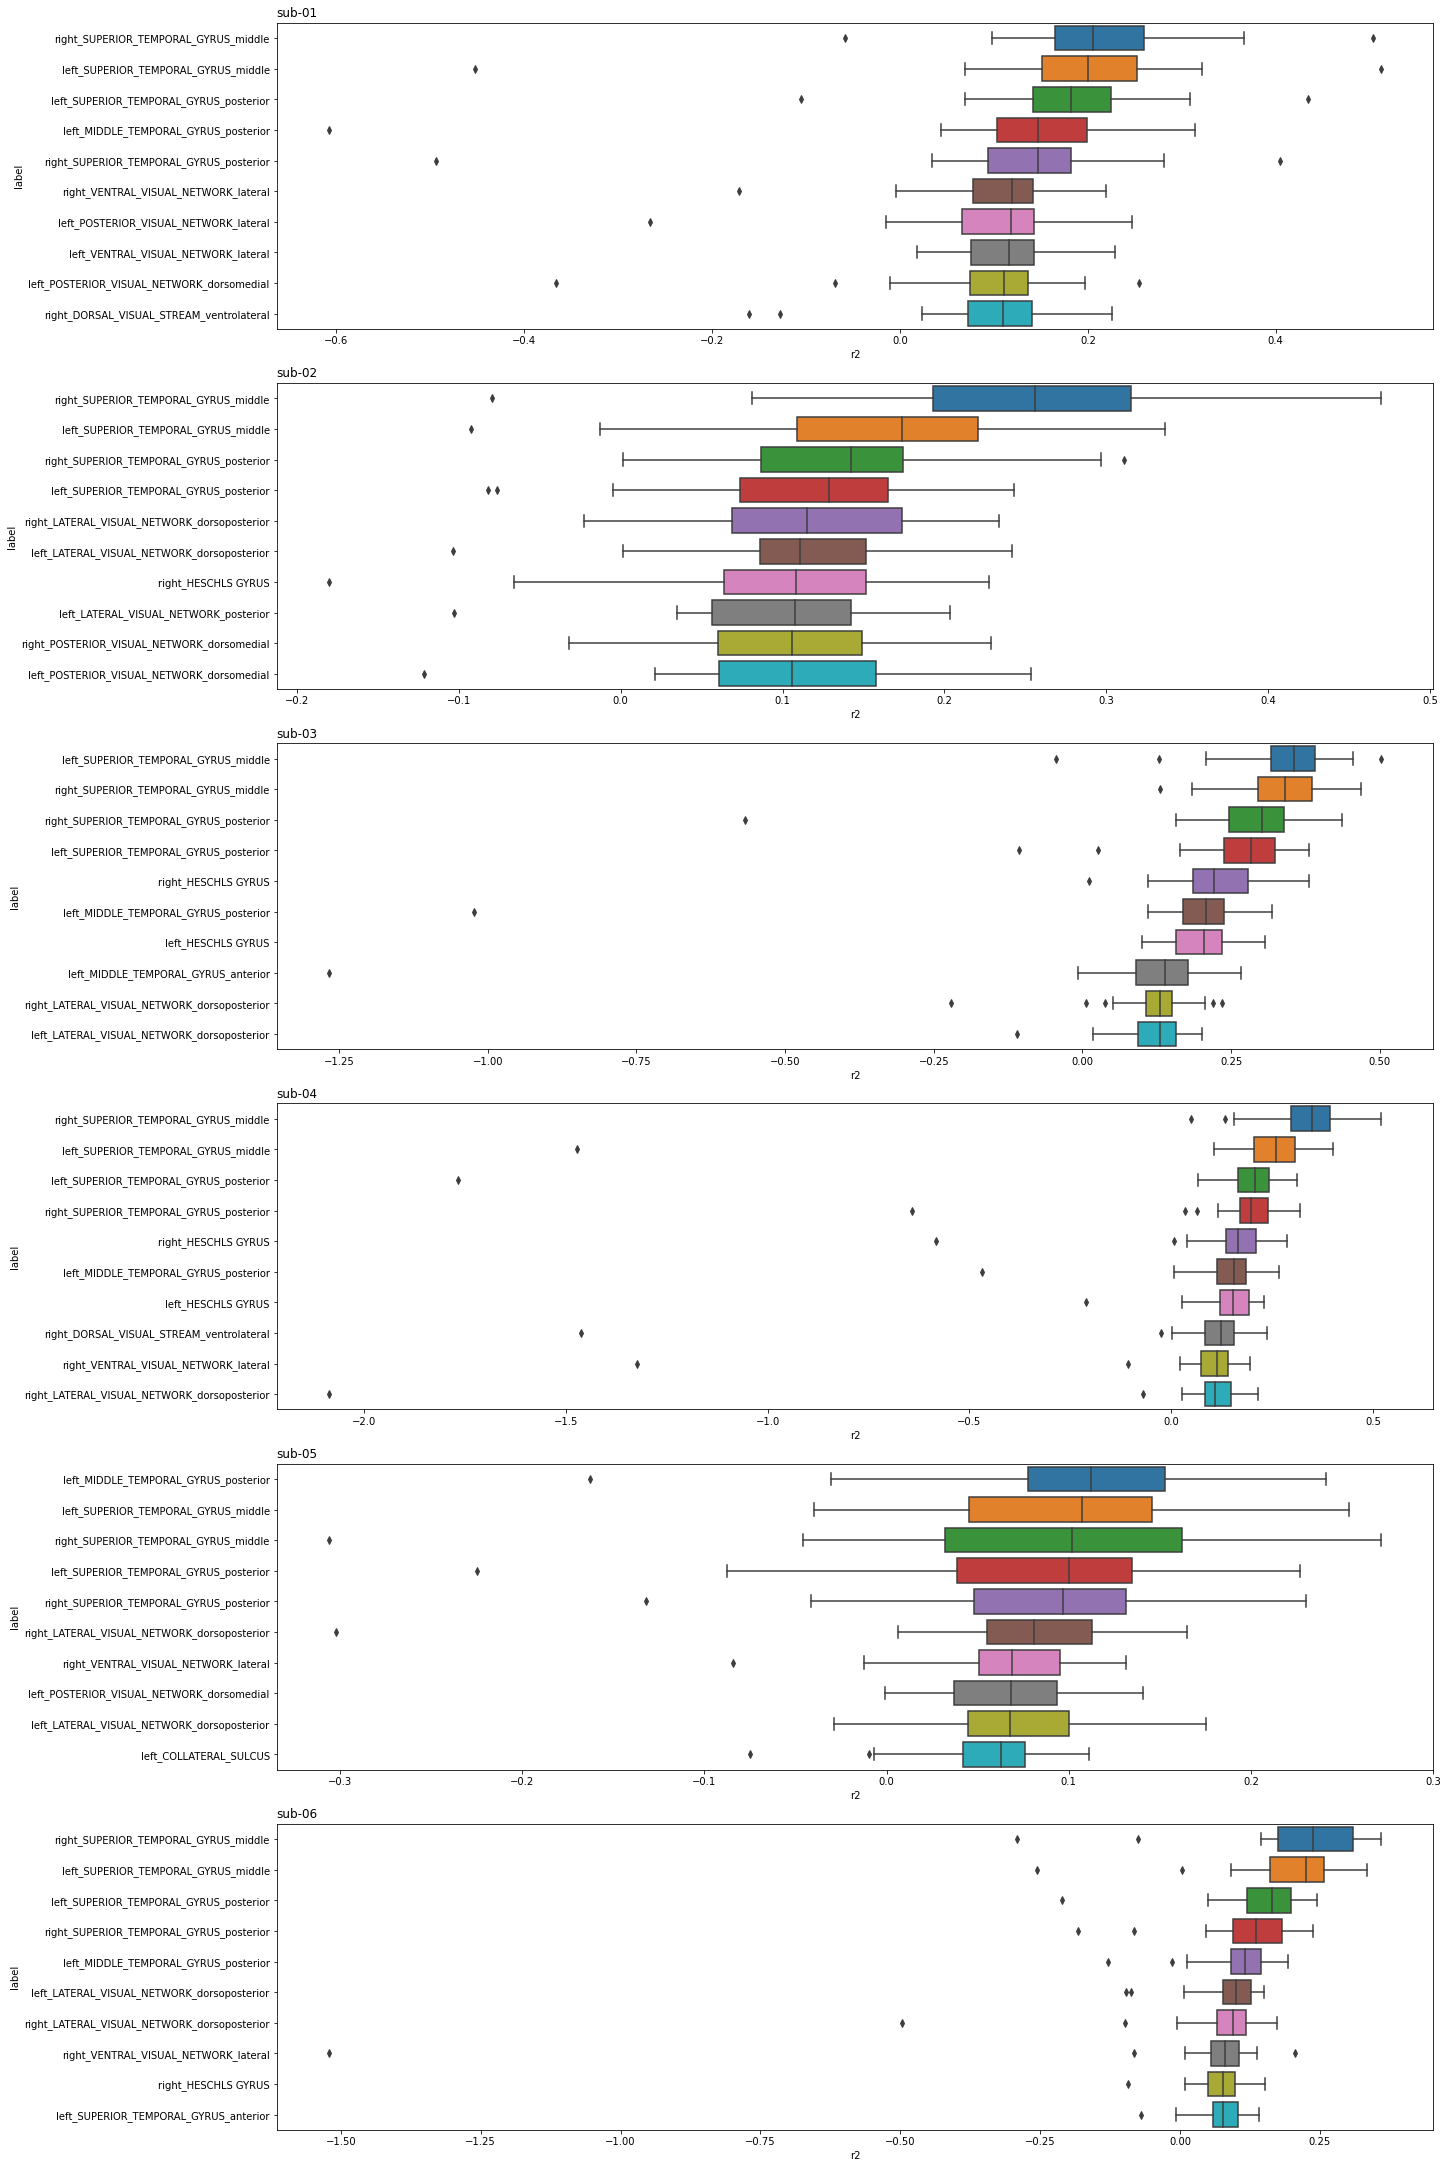

In [47]:
fig = plt.figure(figsize=(20, 30), constrained_layout=True)
gs = GridSpec(6, 1, figure=fig)

df_median  = df.groupby(by=['subject', 'label']).median()
for i, sub in enumerate(subjects):
    print(sub)
    ax = fig.add_subplot(gs[i, :])
    
    a = df_median.loc[sub].sort_values(by='r2', ascending=False)
    order = list(a.head(10).index)
    
    sub_df = df.loc[df['subject']==sub]
    sub_df = sub_df.loc[sub_df['label'].isin(order)]
    sns.boxplot(data=sub_df, x='r2', y='label', order=order, ax=ax)
    ax.set_title(sub, loc='left')
    
    best = order[0]
    best_group = sub_df.loc[sub_df['label']==best]
    for roi in order[1:]:
        roi_group = sub_df.loc[sub_df['label']==roi]
        print('paired ttest between {} and {} in {}'.format(best, roi, sub))
        a = ttest_rel(best_group['r2'], roi_group['r2'])
        print(a)
    

fig.savefig('/home/maelle/Results/figures/figure_papier/baseline_stat.jpg')